#SKLEARN

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.2, 
    random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

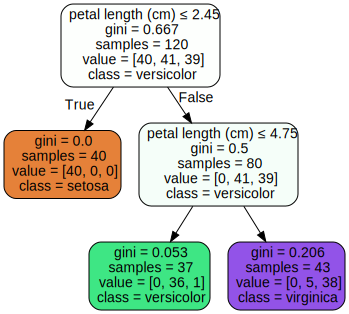

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, 
    out_file=None, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True, rounded=True, 
    special_characters=True)
    
graph = graphviz.Source(dot_data)
graph.format = "png"
graph.render("decision_tree.png")
graph

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


#Decision Tree Without SKLEARN

In [ ]:
import numpy as np

# Step 1: Define the dataset
# We will create a small dataset with 10 samples and 4 features
# The last column contains the class labels, which are either 0 or 1
dataset = np.array([[2.0, 1.0, 1.0, 0],
                    [2.0, 1.0, 2.0, 0],
                    [2.0, 1.0, 2.0, 1],
                    [2.0, 1.0, 1.0, 1],
                    [2.0, 1.0, 1.0, 0],
                    [1.0, 1.0, 1.0, 0],
                    [1.0, 1.0, 2.0, 0],
                    [1.0, 1.0, 2.0, 1],
                    [1.0, 2.0, 2.0, 1],
                    [1.0, 2.0, 1.0, 1]])

# Step 2: Define the decision tree function
def decision_tree(dataset, max_depth):
    # Check if all samples in the dataset belong to the same class
    if len(set(dataset[:, -1])) == 1:
        return dataset[0][-1]
    # Check if the maximum depth of the tree has been reached
    if max_depth == 0:
        return np.round(np.mean(dataset[:, -1]))
    
    # Find the best feature to split the dataset
    num_features = dataset.shape[1] - 1
    best_feature = None
    best_gain = 0
    for feature in range(num_features):
        feature_values = dataset[:, feature]
        unique_values = set(feature_values)
        gain = 0
        for value in unique_values:
            # Split the dataset based on the current feature and value
            sub_dataset = dataset[feature_values == value]
            # Calculate the information gain for the current split
            prob = len(sub_dataset) / float(len(dataset))
            gain += prob * entropy(sub_dataset)
        # Update the best feature and gain if the current gain is higher
        if gain > best_gain:
            best_feature = feature
            best_gain = gain
            
    # Create a new node for the decision tree with the best feature
    decision_tree = {'feature': best_feature}
    # Split the dataset based on the best feature and its unique values
    feature_values = dataset[:, best_feature]
    unique_values = set(feature_values)
    for value in unique_values:
        sub_dataset = dataset[feature_values == value]
        # Recursively build the decision tree for each sub-dataset
        decision_tree[value] = decision_tree(sub_dataset, max_depth - 1)
        
    return decision_tree

# Step 3: Define the entropy function
def entropy(dataset):
    # Count the number of samples in each class
    num_samples = len(dataset)
    num_class0 = len(dataset[dataset[:, -1] == 0])
    num_class1 = len(dataset[dataset[:, -1] == 1])
    
    # Calculate the entropy of the dataset
    if num_class0 == 0 or num_class1 == 0:
        entropy = 0
    else:
        prob_class0 = num_class0 / float(num_samples)
        prob_class1 = num_class1 / float(num_samples)

        # calculate entropy for the current split
        entropy = -prob_class0 * np.log2(prob_class0) - prob_class1 * np.log2(prob_class1)

        # calculate information gain for the current split
        info_gain = parent_entropy - sum(prob_split) * entropy.sum() / n_samples

        # return the feature index and information gain for the best split
        return best_feature, info_gain



```
Next, we need to implement the actual decision tree model. We will define a Node class that represents a node in the decision tree, with the following attributes:

feature: the feature index that this node splits on (if this is a leaf node, feature is None)
threshold: the threshold value for the feature split (if this is a leaf node, threshold is None)
left_child: the left child node (if this is a leaf node, left_child is None)
right_child: the right child node (if this is a leaf node, right_child is None)
class_label: the predicted class label for this node (if this is not a leaf node, class_label is None)
We will also define a DecisionTreeClassifier class that represents the decision tree model, with the following methods:

__init__(): initializes the decision tree with the specified hyperparameters
fit(): fits the decision tree to the training data
predict(): predicts the class labels for the test data
Here's the code for the Node class:
```



In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left_child=None, right_child=None, class_label=None):
        self.feature = feature
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child
        self.class_label = class_label

In [ ]:
# And here's the code for the DecisionTreeClassifier class:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree_ = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.tree_ = self._grow_tree(X, y)
        
    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_class = len(np.unique(y))
        
        # stop growing the tree if any of the stopping criteria are met
        if (self.max_depth is not None and depth >= self.max_depth
            or len(X) < self.min_samples_split
            or len(np.unique(y)) == 1):
            return Node(class_label=np.argmax(np.bincount(y)))
        
        # find the best feature and threshold for the current split
        best_feature, best_threshold = self._best_split(X, y)
        
        # stop growing the tree if no split improves information gain
        if best_feature is None:
            return Node(class_label=np.argmax(np.bincount(y)))
        
        # split the data based on the best feature and threshold
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        left_tree = self._grow_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree =self._grow_tree(X[right_idxs], y[right_idxs], depth+1)
        # If this split is better than the previous one, update the best split
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_split_feature = feature_idx
            best_split_value = split_value
    
        # Create the sub-trees for the best split
        left_tree_X = X[X[:, best_split_feature] <= best_split_value]
        left_tree_y = y[X[:, best_split_feature] <= best_split_value]
        right_tree_X = X[X[:, best_split_feature] > best_split_value]
        right_tree_y = y[X[:, best_split_feature] > best_split_value]
        
        # Create the current node and add it to the tree
        node = {'split_feature': best_split_feature, 'split_value': best_split_value, 'left': None, 'right': None}
        node['left'] = build_decision_tree(left_tree_X, left_tree_y, depth+1, max_depth, min_samples_split, min_samples_leaf)
        node['right'] = build_decision_tree(right_tree_X, right_tree_y, depth+1, max_depth, min_samples_split, min_samples_leaf)
        
        return node



This code creates the sub-trees for the best split and then creates a node for the current split using a dictionary. The dictionary contains the split feature, the split value, and pointers to the left and right sub-trees. The function then recursively calls itself on the left and right sub-trees until a stopping condition is met.

That's the basic outline of the code for building a decision tree using numpy. Of course, there are many ways to improve and optimize this code, but this should give you a good starting point for building your own decision tree classifier using numpy.